# Neural Networks and Intelligent Computing Systems
## Lab 1. Supervised Learning: Classification
### Study datasets of UCI repository and

*   List item
*   List item

Kaggle platform
#### Pigi Lozou

In [ ]:
# mount drive for data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## UCI dataset
### EEG Eye State Data Set Introduction and Overview:

EEG Eye State Data Set is a set of 14 EEGs and a value indicating the condition of the eyes.

Characteristics   | Description
--- | ---
Data Set Characteristics:   | Multivariate, Sequential, Time-Series
Number of Instances: | 14980
Area: | Life
Attribute Characteristics: | Integer, Real
Number of Attributes: | 15
Date Donated | 2013-06-10
Associated Tasks: | Classification
Missing Values? | N/A

In [ ]:
from scipy.io import arff
import pandas as pd
random_state = 1000
data_dir = '/content/drive/MyDrive/EEG Eye State.arff'
raw_data = arff.loadarff(data_dir)
data_df = pd.DataFrame(raw_data[0])

print(data_df.keys())
print(data_df.dtypes)
print(data_df.isna().sum().sum())

data_targets=data_df.iloc[:,-1]
data=data_df.iloc[:,:-1]

targets = data_targets.unique()
print(targets)

for target in targets: print(data_targets.value_counts()[target], data_targets.value_counts()[target]/14980)

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')
AF3             float64
F7              float64
F3              float64
FC5             float64
T7              float64
P7              float64
O1              float64
O2              float64
P8              float64
T8              float64
FC6             float64
F4              float64
F8              float64
AF4             float64
eyeDetection     object
dtype: object
0
[b'0' b'1']
8257 0.5512016021361815
6723 0.4487983978638184


* The number of features is 15. The headings are: 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'eyeDetection' and their types are listed next to it.

* There are no missing values. (The '0' listed above).

* The dataset is balanced as it does not exceed the percentage of 60%-40% in binary datasets


* The labels of the two classes are b'0' b'1'




In [ ]:
# convert targets to 0 and 1
for i in range(2): data_targets = data_targets.replace(to_replace=targets[i],value=i)

In [ ]:
import numpy as np
np.unique(data_targets)

array([0, 1])

We convert b'0' to 0 and b'1' to 1 respectively so we can process our data

## Preparation

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, data_targets, test_size = 0.3, random_state=random_state)

print(x_train.shape, y_train.shape, (y_train==0).shape, (y_train==1).shape)
print(x_test.shape, y_test.shape, (y_test==0).shape, (y_test==1).shape)

(10486, 14) (10486,) (10486,) (10486,)
(4494, 14) (4494,) (4494,) (4494,)


The data set was divided into a training set (train set) and a set (test set) with 30% of the samples in the test set.

Characteristics   | Description
--- | ---
 train data| 10486
 features| 14
 test data| 4494
 features| 14



## Classification

We implement four classifiers:

1. Dummy
2. Gaussian Naive Bayes (GNB)
3. KNearestNeighbors (kNN)
4. Logistic Regression (LR)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifiers_dict = {
    "Dummy": {
        "classifier" : DummyClassifier(),
        "cv_accuracy" : [],
        "cv_f1_score" : [] ,
      },
    "GNB": {
        "classifier" : GaussianNB(),
        "cv_accuracy" : [],
        "cv_f1_score" : [] ,
      },
    "kNN": {
        "classifier" : KNeighborsClassifier(),
        "cv_accuracy" : [],
        "cv_f1_score" : [] ,
      },
    "LogisticRegression": {
        "classifier" :  LogisticRegression(max_iter=500),
        "cv_accuracy" : [],
        "cv_f1_score" : [] ,
      }
}

In [ ]:
from sklearn.model_selection import cross_val_score
import time
import matplotlib.pyplot as plt


for classifier_name in classifiers_dict.keys():
  st = time.time()
  print(f"Fitting classifier: {classifier_name} ")
  classifier =   classifiers_dict[classifier_name]["classifier"]

  #10 fold cross validtion
  cv_accuracies = cross_val_score(classifier, data, data_targets, cv=10, scoring='accuracy')
  cv_f1_scores = cross_val_score(classifier, data, data_targets, cv=10, scoring='f1')
  classifiers_dict[classifier_name]["cv_accuracy"] = np.mean(cv_accuracies)
  classifiers_dict[classifier_name]["cv_f1_score"] = np.mean(cv_f1_scores)
  print(f"\tAccuracy: {np.mean(cv_accuracies)} ")
  print(f"\tF1 score: {np.mean(cv_f1_scores)} ")
  et = time.time()
  elapsed_time = et - st
  print('\tExecution time:', elapsed_time, 'seconds')

Fitting classifier: Dummy 
	Accuracy: 0.5512016021361814 
	F1 score: 0.0 
	Execution time: 0.09855127334594727 seconds
Fitting classifier: GNB 
	Accuracy: 0.441388518024032 
	F1 score: 0.5955425461901662 
	Execution time: 0.23224353790283203 seconds
Fitting classifier: kNN 
	Accuracy: 0.5693591455273698 
	F1 score: 0.5159718742535764 
	Execution time: 5.2953386306762695 seconds
Fitting classifier: LogisticRegression 
	Accuracy: 0.4891188251001335 
	F1 score: 0.3626035156823477 
	Execution time: 18.75407838821411 seconds


At this stage the classifiers have not received any optimization (out-of-the-box) and all parameters are at default values.

### Score metrics

|| Dummy | GNB | kNN | LogisticRegression: |
|---|---|---|---|---|
|Accuracy| 0.5512016021361814 | 0.441388518024032 | 0.5693591455273698 | 0.4891188251001335 |
|F1 score| 0.0 | 0.5955425461901662 | 0.5159718742535764 | 0.3626035156823477 |
|Execution time (sec)|  0.06533694267272949   | 0.19214940071105957 | 4.964214563369751  | 15.381778955459595

### Bar plot comparison

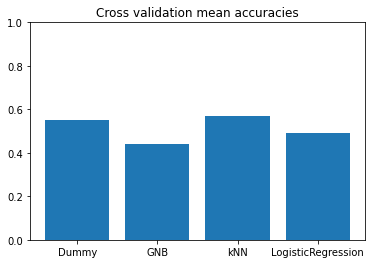

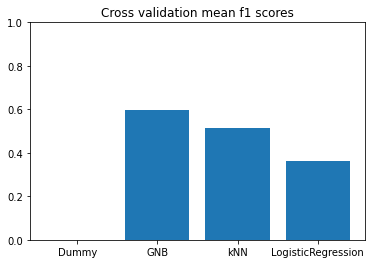

In [ ]:
plt.bar(classifiers_dict.keys(),[classifiers_dict[classifier_name]["cv_accuracy"] for classifier_name in classifiers_dict.keys()])
plt.ylim(0,1)
plt.title("Cross validation mean accuracies")
plt.show()
plt.bar(classifiers_dict.keys(),[classifiers_dict[classifier_name]["cv_f1_score"] for classifier_name in classifiers_dict.keys()])
plt.ylim(0,1)
plt.title("Cross validation mean f1 scores")
plt.show()

The yields obtained based on the dataset are around 0.5. It is expected to be at this value as we have not passed the necessary information to our classifiers to achieve a better rate.

## Optimization


In [ ]:
train_variance = x_train.var(axis=0)
print(train_variance)
print(np.min(train_variance), np.max(train_variance))

AF3    8.871412e+06
F7     2.623706e+03
F3     2.626180e+03
FC5    3.887249e+07
T7     1.601457e+03
P7     1.222041e+07
O1     3.024055e+07
O2     1.082486e+03
P8     6.520210e+06
T8     1.901943e+03
FC6    1.785470e+03
F4     2.293495e+03
F8     2.085476e+06
AF4    4.958068e+07
dtype: float64
1082.4855676973787 49580681.48450675


In [ ]:
optimised_classifiers_dict = {
    "GNB": {
        "accuracy" : [],
        "f1_score" : [] ,
      },
    "kNN": {
        "accuracy" : [],
        "f1_score" : [] ,
      },
    "LogisticRegression": {
        "accuracy" : [],
        "f1_score" : [] ,
      }
}

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import classification_report, f1_score, accuracy_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import time

#### Pipeline kNN

In [ ]:
classifier_name = 'kNN'

##### Optimize using f1-score

In [ ]:
# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = KNeighborsClassifier()

vthreshold = [0, 1000, 10000, 10000000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [1 , 6, 10, 14]
k = [1, 5, 15, 20, 30, 50] # η υπερπαράμετρος του ταξινομητή
weights = ['uniform', 'distance']
metric = ['minkowski', 'euclideam', 'manhattan']

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         kNN__n_neighbors=k,
         kNN__weights=weights,
         kNN__metric=metric,
         ),
    cv=10,
    scoring='f1',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))
print(estimator.best_estimator_)
print(estimator.best_params_)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3240 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/di

Συνολικός χρόνος fit και predict: 253.96079087257385 seconds
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2502
           1       0.81      0.80      0.81      1992

    accuracy                           0.83      4494
   macro avg       0.83      0.83      0.83      4494
weighted avg       0.83      0.83      0.83      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 5, 'kNN__weights': 'distance', 'pca__n_components': 14, 'selector__threshold': 0}


Progressive

In [ ]:
clf = KNeighborsClassifier(weights='distance' , metric = 'manhattan')

vthreshold = [0, 1000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [11, 12, 13, 14]
k = [3,4,5,6,7] # η υπερπαράμετρος του ταξινομητή

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         kNN__n_neighbors=k),
    cv=10,
    scoring='f1',
    n_jobs=-1)


start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pa

Συνολικός χρόνος fit και predict: 56.463831663131714 seconds
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2502
           1       0.82      0.80      0.81      1992

    accuracy                           0.84      4494
   macro avg       0.83      0.83      0.83      4494
weighted avg       0.84      0.84      0.84      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=6,
                                      weights='distance'))])
{'kNN__n_neighbors': 6, 'pca__n_components': 14, 'selector__threshold': 0}



| vthreshold|n_components| k|
|---|---|---|
|0|14|6|

In [ ]:
print(f1_score(y_test, y_pred))
optimised_classifiers_dict[classifier_name]['f1_score'] = [f1_score(y_test, y_pred)]

0.8126903553299492


##### Optimize using accuracy

In [ ]:
# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = KNeighborsClassifier()

vthreshold = [0, 1000, 10000, 10000000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [1 , 6, 10, 14]
k = [1, 5, 15, 20, 30, 50] # η υπερπαράμετρος του ταξινομητή
weights = ['uniform', 'distance']
metric = ['minkowski', 'euclideam', 'manhattan']


pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         kNN__n_neighbors=k,
         kNN__weights=weights,
         kNN__metric=metric, ),
    cv=10,
    scoring='accuracy',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3240 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/di

Συνολικός χρόνος fit και predict: 244.5715615749359 seconds
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2502
           1       0.81      0.80      0.81      1992

    accuracy                           0.83      4494
   macro avg       0.83      0.83      0.83      4494
weighted avg       0.83      0.83      0.83      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 5, 'kNN__weights': 'distance', 'pca__n_components': 14, 'selector__threshold': 0}


| vthreshold|n_components| k| metric | weights |
|---|---|---|----|---|
|0|14|5| manhattan|  distance |

Progressive

In [ ]:
clf = KNeighborsClassifier(weights='distance' , metric = 'manhattan')

vthreshold = [0, 1000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [11, 12, 13, 14]
k = [3, 4, 5, 6, 7] # η υπερπαράμετρος του ταξινομητή
pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         kNN__n_neighbors=k),
    cv=10,
    scoring='accuracy',
    n_jobs=-1)


start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))
print(estimator.best_estimator_)
print(estimator.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pa

Συνολικός χρόνος fit και predict: 49.0259313583374 seconds
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2502
           1       0.82      0.80      0.81      1992

    accuracy                           0.84      4494
   macro avg       0.83      0.83      0.83      4494
weighted avg       0.84      0.84      0.84      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=6,
                                      weights='distance'))])
{'kNN__n_neighbors': 6, 'pca__n_components': 14, 'selector__threshold': 0}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(accuracy_score(y_test, y_pred))
optimised_classifiers_dict[classifier_name]['accuracy'] = [accuracy_score(y_test, y_pred)]

0.835781041388518


### Pipeline GNB

In [ ]:
classifier_name = 'GNB'

#### Optimize using f1-score

In [ ]:
# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = GaussianNB() # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0, 1000, 10000, 10000000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [1 , 6, 10, 14]
var_smoothing= np.logspace(0,-9, num=10)

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         GNB__var_smoothing=var_smoothing,
         ),
    cv=10,
    scoring='f1',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)


Συνολικός χρόνος fit και predict: 29.06548833847046 seconds
              precision    recall  f1-score   support

           0       0.66      0.06      0.11      2502
           1       0.45      0.96      0.61      1992

    accuracy                           0.46      4494
   macro avg       0.55      0.51      0.36      4494
weighted avg       0.56      0.46      0.33      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('GNB', GaussianNB())])
{'GNB__var_smoothing': 1e-09, 'pca__n_components': 14, 'selector__threshold': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
550 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist

Progressive

In [ ]:
clf = GaussianNB()
vthreshold = [0, 1000 ] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [11, 12, 13, 14]
var_smoothing= np.logspace(-6,-9, num=10)


pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         GNB__var_smoothing=var_smoothing,
         ),
    cv=10,
    scoring='f1',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))
print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 17.015525341033936 seconds
              precision    recall  f1-score   support

           0       0.66      0.06      0.11      2502
           1       0.45      0.96      0.61      1992

    accuracy                           0.46      4494
   macro avg       0.55      0.51      0.36      4494
weighted avg       0.56      0.46      0.33      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('GNB', GaussianNB())])
{'GNB__var_smoothing': 1e-09, 'pca__n_components': 14, 'selector__threshold': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-p

In [ ]:
print(f1_score(y_test, y_pred))
optimised_classifiers_dict[classifier_name]['f1_score'] = [f1_score(y_test, y_pred)]

0.61152


#### Optimize using accuracy

In [ ]:
# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = GaussianNB()

vthreshold = [0, 1000, 10000, 10000000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [1 , 6, 10, 14]
var_smoothing= np.logspace(0,-9, num=10)

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         GNB__var_smoothing=var_smoothing,
         ),
    cv=10,
    scoring='accuracy',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 26.86266279220581 seconds
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2502
           1       0.00      0.00      0.00      1992

    accuracy                           0.56      4494
   macro avg       0.28      0.50      0.36      4494
weighted avg       0.31      0.56      0.40      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=1)),
                ('GNB', GaussianNB(var_smoothing=1.0))])
{'GNB__var_smoothing': 1.0, 'pca__n_components': 1, 'selector__threshold': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
550 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist

Progressive

In [ ]:
vthreshold = [0, 1000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [11, 12, 13, 14]
var_smoothing= np.logspace(-7,-9, num=10)

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         GNB__var_smoothing=var_smoothing,
         ),
    cv=10,
    scoring='accuracy',
    n_jobs=-1)


start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))
print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 16.872072219848633 seconds
              precision    recall  f1-score   support

           0       0.66      0.06      0.11      2502
           1       0.45      0.96      0.61      1992

    accuracy                           0.46      4494
   macro avg       0.55      0.51      0.36      4494
weighted avg       0.56      0.46      0.33      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('GNB', GaussianNB())])
{'GNB__var_smoothing': 1e-09, 'pca__n_components': 14, 'selector__threshold': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-p

In [ ]:
print(accuracy_score(y_test, y_pred))
optimised_classifiers_dict[classifier_name]['accuracy'] = [accuracy_score(y_test, y_pred)]

0.45972407654650643


In [ ]:
optimised_classifiers_dict

{'GNB': {'accuracy': [0.45972407654650643], 'f1_score': [0.61152]},
 'kNN': {'accuracy': [0.835781041388518], 'f1_score': [0.8126903553299492]},
 'LogisticRegression': {'accuracy': [], 'f1_score': []}}

### Pipeline LogisticRegression

In [ ]:
classifier_name = 'LogisticRegression'

#### Optimize using f1-score

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = LogisticRegression(max_iter=500)

vthreshold = [0, 1000, 10000]
n_components = [5, 10,  14]
penalty = [ 'l1', 'l2', 'elasticnet', 'none']
tolerance = [1e-6, 1e-4, 1e-2]
regularizetion_strength = [0.3, 0.8 , 1]

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         LogisticRegression__penalty=penalty,
         LogisticRegression__tol=tolerance,
         LogisticRegression__C=regularizetion_strength,
         ),
    cv=10,
    scoring='f1',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2052 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
594 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

Συνολικός χρόνος fit και predict: 200.88171648979187 seconds
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2502
           1       0.62      0.48      0.54      1992

    accuracy                           0.64      4494
   macro avg       0.63      0.62      0.62      4494
weighted avg       0.63      0.64      0.63      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('LogisticRegression',
                 LogisticRegression(C=0.3, max_iter=500, penalty='none',
                                    tol=1e-06))])
{'LogisticRegression__C': 0.3, 'LogisticRegression__penalty': 'none', 'LogisticRegression__tol': 1e-06, 'pca__n_components': 14, 'selector__threshold': 0}


Progressive

In [ ]:
clf = LogisticRegression(max_iter = 500, penalty = 'none')

vthreshold = [0, 1000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [12, 13, 14]
tolerance = [1e-8, 1e-6, 1e-7]
regularizetion_strength = [0.2, 0.3, 0.4]

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         LogisticRegression__tol=tolerance,
         LogisticRegression__C=regularizetion_strength,
         ),
    cv=10,
    scoring='f1',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pa

Συνολικός χρόνος fit και predict: 219.99621963500977 seconds
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2502
           1       0.62      0.48      0.54      1992

    accuracy                           0.64      4494
   macro avg       0.63      0.62      0.62      4494
weighted avg       0.63      0.64      0.63      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('LogisticRegression',
                 LogisticRegression(C=0.2, max_iter=500, penalty='none',
                                    tol=1e-08))])
{'LogisticRegression__C': 0.2, 'LogisticRegression__tol': 1e-08, 'pca__n_components': 14, 'selector__threshold': 0}


In [ ]:
print(f1_score(y_test, y_pred))
optimised_classifiers_dict[classifier_name]['f1_score'] = [f1_score(y_test, y_pred)]

0.5428491149199214


#### Optimize using accuracy

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = LogisticRegression()

vthreshold = [0, 1000, 10000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [5, 10, 14]
penalty = ['l1', 'l2', 'elasticnet', 'none']
tolerance = [1e-6, 1e-4, 1e-2]
regularizetion_strength = [0.3, 0.8 , 1]
max_iter = [100, 200, 300]

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         LogisticRegression__penalty=penalty,
         LogisticRegression__tol=tolerance,
         LogisticRegression__C=regularizetion_strength,
         LogisticRegression__max_iter=max_iter,
         ),
    cv=10,
    scoring='accuracy',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6156 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1782 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

Συνολικός χρόνος fit και predict: 477.7318160533905 seconds
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2502
           1       0.61      0.49      0.54      1992

    accuracy                           0.64      4494
   macro avg       0.63      0.62      0.62      4494
weighted avg       0.63      0.64      0.63      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('LogisticRegression',
                 LogisticRegression(C=0.3, max_iter=200, penalty='none',
                                    tol=1e-06))])
{'LogisticRegression__C': 0.3, 'LogisticRegression__max_iter': 200, 'LogisticRegression__penalty': 'none', 'LogisticRegression__tol': 1e-06, 'pca__n_components': 14, 'selector__threshold': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Progressive

In [ ]:
clf = LogisticRegression(penalty = 'none')

vthreshold = [0, 1000, 10000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [5, 10, 14]
tolerance = [1e-7, 1e-6, 1e-5]
regularizetion_strength = [0.3, 0.8 , 1]
max_iter = [100, 200, 300]

pipe = Pipeline(steps=[
    ('selector', selector),
    ('scaler', scaler),
    ('pca', pca),
    (classifier_name, clf)],
     memory = 'tmp')

estimator = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,
         pca__n_components=n_components,
         LogisticRegression__tol=tolerance,
         LogisticRegression__C=regularizetion_strength,
         LogisticRegression__max_iter=max_iter,
         ),
    cv=10,
    scoring='accuracy',
    n_jobs=-1)

start_time = time.time()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, y_pred))

print(estimator.best_estimator_)
print(estimator.best_params_)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
648 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 210, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist

Συνολικός χρόνος fit και predict: 259.9531686306 seconds
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2502
           1       0.61      0.49      0.54      1992

    accuracy                           0.64      4494
   macro avg       0.63      0.62      0.62      4494
weighted avg       0.63      0.64      0.63      4494

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('LogisticRegression',
                 LogisticRegression(C=0.3, max_iter=200, penalty='none',
                                    tol=1e-07))])
{'LogisticRegression__C': 0.3, 'LogisticRegression__max_iter': 200, 'LogisticRegression__tol': 1e-07, 'pca__n_components': 14, 'selector__threshold': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_test, y_pred))
optimised_classifiers_dict[classifier_name]['accuracy'] = [accuracy_score(y_test, y_pred)]

0.6372941700044504


In [ ]:
classifiers_dict

{'Dummy': {'classifier': DummyClassifier(),
  'cv_accuracy': 0.5512016021361814,
  'cv_f1_score': 0.0},
 'GNB': {'classifier': GaussianNB(),
  'cv_accuracy': 0.441388518024032,
  'cv_f1_score': 0.5955425461901662},
 'kNN': {'classifier': KNeighborsClassifier(),
  'cv_accuracy': 0.5693591455273698,
  'cv_f1_score': 0.5159718742535764},
 'LogisticRegression': {'classifier': LogisticRegression(max_iter=500),
  'cv_accuracy': 0.4891188251001335,
  'cv_f1_score': 0.3626035156823477}}

|| Dummy | GNB | kNN | LogisticRegression |
|---|---|---|---|---|
|Accuracy| 0.5512016021361814 | 0.441388518024032 | 0.5693591455273698 | 0.4891188251001335 |
|F1 score| 0.0 | 0.5955425461901662 | 0.5159718742535764 | 0.3626035156823477 |


In [ ]:
optimised_classifiers_dict

{'GNB': {'accuracy': [0.45972407654650643], 'f1_score': [0.61152]},
 'kNN': {'accuracy': [0.835781041388518], 'f1_score': [0.8126903553299492]},
 'LogisticRegression': {'accuracy': [0.6372941700044504],
  'f1_score': [0.5428491149199214]}}

 | | GNB | kNN | LogisticRegression |
|---|---|---|---|
|Accuracy|  0.45972407654650643 | 0.835781041388518 | 0.6372941700044504 |
|F1 score|  0.61152 | 0.8126903553299492 | 0.5428491149199214 |


## Results

The best classifier is optimized kNN while the worst, with the exception of dummies, is GNB in terms of accuracy and LogisticRegression in terms of F1 score.

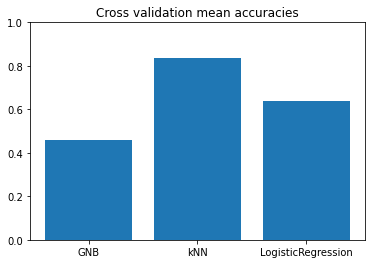

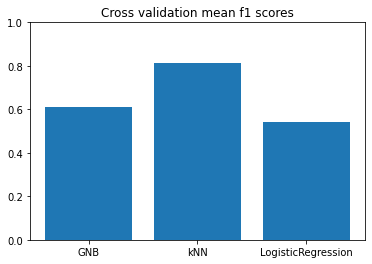

In [ ]:
plt.bar(optimised_classifiers_dict.keys(),[optimised_classifiers_dict[classifier_name]["accuracy"][0] for classifier_name in optimised_classifiers_dict.keys()])
plt.ylim(0,1)
plt.title("Cross validation mean accuracies")
plt.show()
plt.bar(optimised_classifiers_dict.keys(),[optimised_classifiers_dict[classifier_name]["f1_score"][0] for classifier_name in optimised_classifiers_dict.keys()])
plt.ylim(0,1)
plt.title("Cross validation mean f1 scores")
plt.show()

## Conclusions

kNN is the classifier we will use as it is the one that presents the best results. In relation to LogisticRegression where we have features that have a large deviation between them, kNN is more efficient. kNN works better in small datasets and gives better results than the other classifiers